#### Q1 Mother and Daughter Height

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [153]:
df=pd.read_csv('/home/ustudent/Pranav_220962250/Week5/mother_daughter_heights.csv')

In [154]:
x=df['mother height'].values.reshape(-1, 1)
y=df['daughter height'].values

In [155]:
model = SGDRegressor(max_iter=100, eta0=0.00001)
model.fit(x, y)

y_prd=model.predict(x)

print(f'Coefficients: {model.coef_[0]:.5f}')
print(f'Coefficients: {model.intercept_[0]:.5f}')

Coefficients: 0.99661
Coefficients: 0.01553


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [156]:
def gradDescent(epochs, x, y, learnRate):
    b1 = 0
    b0 = 0
    n = len(x)
    cost = []
        
    for i in range(epochs):

        predY = b0 + b1*x
        
        db0 = (-2/n)*(np.sum(y-predY))
        db1 = (-2/n)*(np.sum((y-predY)*x))
        
        b0 = b0 - learnRate*db0
        b1 = b1 - learnRate*db1
        
        mse = np.sum(((y - predY)**2)/n)
        rmse = np.sum(((y - predY)**2)/n)**0.5
        
        cost.append(mse)
        print(f'Epoch {i}:- Slope: {b1}, Intercept: {b0}, MSE : {mse}, RMSE : {rmse}')
        
    return b1, b0, cost

In [157]:
slope, intercept, cost_history = gradDescent(100, df['mother height'], df['daughter height'], 0.00001)

print(f'\nFinal Slope: {slope:.4f}, Final Intercept: {intercept:.4f}')

Epoch 0:- Slope: 0.08083333333333334, Intercept: 0.0012666666666666666, MSE : 4041.333333333333, RMSE : 63.57148207595394
Epoch 1:- Slope: 0.15511944411111112, Intercept: 0.0024306496666666668, MSE : 3414.238305572037, RMSE : 58.43148385564102
Epoch 2:- Slope: 0.22338863500006373, Intercept: 0.003500266026318889, MSE : 2884.6143654091516, RMSE : 53.708606064662966
Epoch 3:- Slope: 0.28612825596202185, Intercept: 0.004483159121214948, MSE : 2437.31131630537, RMSE : 49.36913323429296
Epoch 4:- Slope: 0.34378618327631993, Intercept: 0.005386353239627423, MSE : 2059.5337980203853, RMSE : 45.3820867525986
Epoch 5:- Slope: 0.3967740167732668, Intercept: 0.006216303726468371, MSE : 1740.475267995196, RMSE : 41.71900367932096
Epoch 6:- Slope: 0.44547001810262427, Intercept: 0.006978943065758459, MSE : 1471.0088740047559, RMSE : 38.353733508027034
Epoch 7:- Slope: 0.49022181101237394, Intercept: 0.007679723230573478, MSE : 1243.426375315916, RMSE : 35.26225142154023
Epoch 8:- Slope: 0.531348862

In [158]:
print(f'{slope}, {intercept}')

0.9977717503739967, 0.015539935399557643


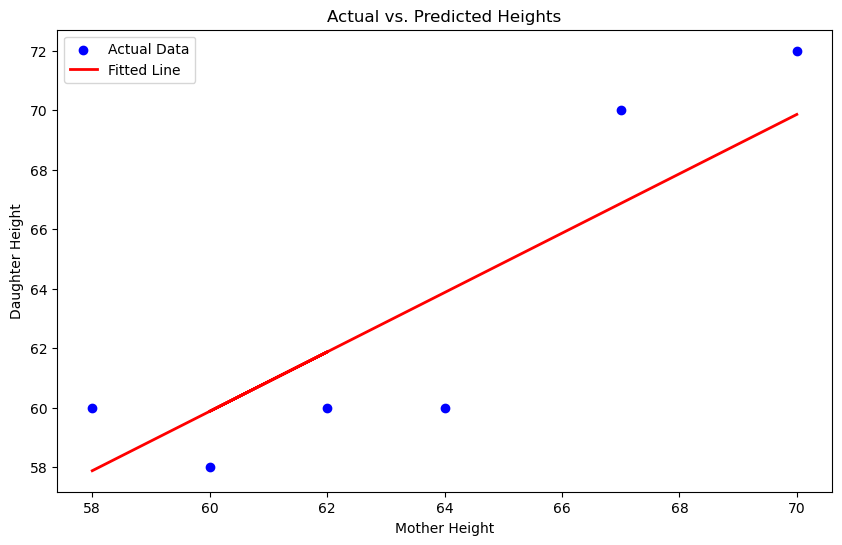

In [159]:
predicted_y = intercept + slope * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, predicted_y, color='red', label='Fitted Line', linewidth=2)
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Actual vs. Predicted Heights')
plt.legend()
plt.show()

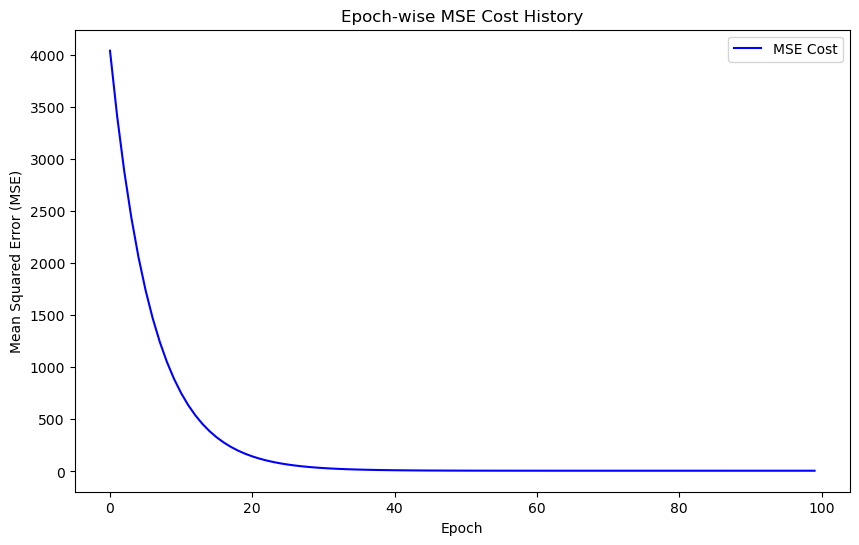

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue', label='MSE Cost')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Epoch-wise MSE Cost History')
plt.legend()
plt.show()

#### Q2 Study Hours

In [161]:
data2 = {"hrs": [1, 2, 3, 4, 5, 6, 7, 8], "pass": [0, 0, 0, 0, 1, 1, 1, 1]}
df2 = pd.DataFrame(data2)

df2.to_csv('study.csv', index=False)  # Ensure index is not written

In [162]:
X = df2[['hrs']].values
y = df2['pass'].values

In [163]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [164]:
m = len(X)


def logreg(X,y,ep,learning_rate = 0.01):
    
    theta = np.zeros(X.shape[1])  # No bias term, only one parameter for 'hrs'
    errors = []
    for i in range(ep):
        
        predictions = sigmoid(X.dot(theta))
        error = predictions - y
        gradients = X.T.dot(error) / m
        theta -= learning_rate * gradients
        mse = np.mean((predictions - y) ** 2)
        errors.append(mse)
        print(f'theta {theta} mse {mse}')
        
    pred_probs = sigmoid(X.dot(theta))
    pred_labels = (pred_probs >= 0.5).astype(int)
    accuracy = accuracy_score(y, pred_labels)
    new_hours = np.array([[3.5], [7.5]])
    pred_prob_new_hours = sigmoid(new_hours.dot(theta))
    plt.figure(figsize=(12, 6))
    plt.plot(errors, color='green')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('Error vs Iteration')
    plt.show()
    print(f"Gradient Descent Coefficients: Slope = {theta[0]}")
    print(f"Accuracy of Gradient Descent Model: {accuracy:.2f}")
    print(f"Probability of passing with 3.5 hours of study: {pred_prob_new_hours[0]:.4f}")
    print(f"Probability of passing with 7.5 hours of study: {pred_prob_new_hours[1]:.4f}")

theta [0.01] mse 0.25
theta [0.01936273] mse 0.2451621134901221
theta [0.02813001] mse 0.24093523350599105
theta [0.03634179] mse 0.23725227554917122
theta [0.04403589] mse 0.23405030114122374
theta [0.05124792] mse 0.23127143428314775
theta [0.0580112] mse 0.22886325391071854
theta [0.06435683] mse 0.22677882416789885
theta [0.07031372] mse 0.22497648929894343
theta [0.07590869] mse 0.22341952766291173
theta [0.08116658] mse 0.22207573228445238
theta [0.08611041] mse 0.22091696401787106
theta [0.09076144] mse 0.21991870736303057
theta [0.09513934] mse 0.2190596473662667
theta [0.09926229] mse 0.21832127792311173
theta [0.1031471] mse 0.21768754631166964
theta [0.10680934] mse 0.2171445352113986
theta [0.11026338] mse 0.21668018124189484
theta [0.11352256] mse 0.21628402776878558
theta [0.11659923] mse 0.21594700906168765
theta [0.11950483] mse 0.21566126263370727
theta [0.12224999] mse 0.215419966590973
theta [0.12484457] mse 0.21521719897050667
theta [0.12729775] mse 0.21504781627624

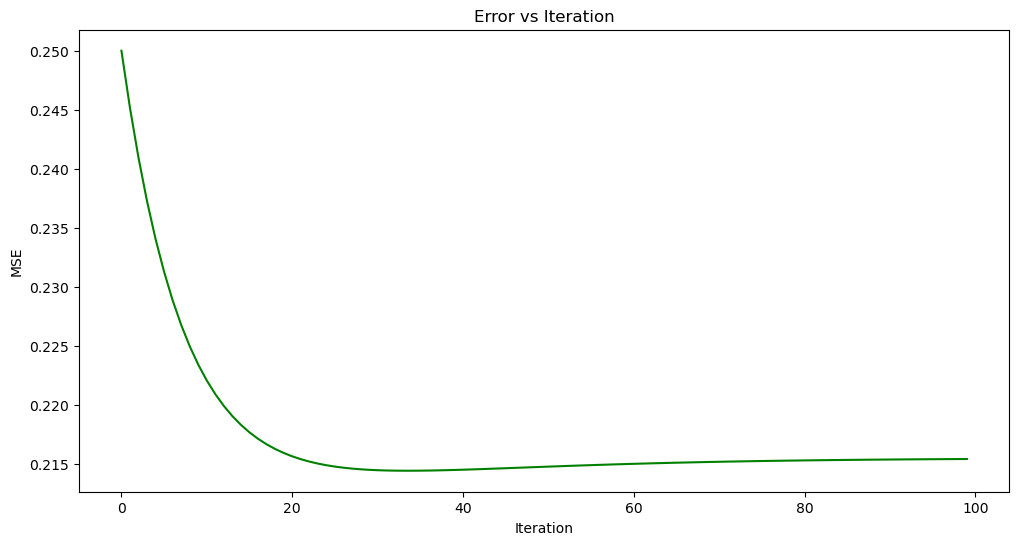

Gradient Descent Coefficients: Slope = 0.17192835419685185
Accuracy of Gradient Descent Model: 0.50
Probability of passing with 3.5 hours of study: 0.6461
Probability of passing with 7.5 hours of study: 0.7841


In [165]:
logreg(X,y,100)

#### Q3 Logistic Regression

In [166]:
file = pd.read_csv("q3.csv")
file

,x1,x2,y
0,4,1,2
1,2,8,-14
2,1,0,1
3,3,2,-1
4,1,4,-7
5,6,7,-8


In [167]:
X1 = file["x1"]
X2 = file["x2"]
Y = file["y"]
X2 = np.array(X2)
X1 = np.array(X1)
Y = np.array(Y)
Y = np.array([1 if i > 0 else 0 for i in Y])

In [ ]:
b1 = 0
b2 = 0
b0 = 0
L = 0.01
log = []
for _ in range(1000):
    errors = sigmoid(b0 + b1 * X1 + b2 * X2) - Y
    b0 -= L * np.sum(errors) / len(X1)
    b1 -= L * np.sum(errors * X1) / len(X1)
    b2 -= L * np.sum(errors * X2) / len(X2)
    y_p = sigmoid(b0+b1*X1+b2*X2)
    loss = compute_loss(Y, y_p)
    log.append(loss)

Y_pred_sigmoid = sigmoid(b0 + b1 * X1 + b2 * X2)
print(b0, b1, b2)

In [ ]:
rmse = root_mean_squared_error(Y, Y_pred_sigmoid)
mse = mean_squared_error(Y, Y_pred_sigmoid)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

In [ ]:
plt.plot(range(1000), log, color="green", label="error vs epoch")
plt.legend()
plt.show()

In [ ]:
final = [1 if i > 0.5 else 0 for i in Y_pred_sigmoid]
accuracy = np.mean(final == Y)
print(f'Accuracy: {accuracy * 100:.2f}%')